In the [problem for the education minister]({{ site.baseurl
}}/chapters/10/havana_math) we had a sample of fast-track-marked exams from
2019, and we found that the mean mark was 58.74.  We wondered what we could say
about the eventual mean of the marks for all 8000 or so students.

After a bit of development, we found, in the [reverse probability with bars]({{
site.baseurl }}/chapters/10/bayes_bars) page, that we could use some
probability calculations to draw conclusions about the state of the world, from
some result.  In that page, we calculated the probability of the state of the
world (a box we have been given) from a result (drawing a red ball).

Now we want to draw a conclusion about the state of the world (the eventual
mean of all the 2019 exams) from a result (the mean of the fast-marked sample
of 50 2019 exams).

We will call the 50 fast-track-marked exams the *sample*.  When the 2019
marking is finished, we will have around 8000 marks.  We will call this the
*population*.  We want to draw conclusions about the *population* from the
*sample*.   In particular we want to draw conclusions about the population mean
from the sample mean.

Let us start with the following problem:

**Problem 1**: What is the probability that we will observe a *sample* mean of
*around* 58.74, given that the *population* mean is 62.25?

Referring back to our box and ball problem, this probability is the equivalent
of the probability of getting a red ball from a given box.  Given a state of
the world (the population mean) what the is the probability of the result (the
sample mean).  Once we have probabilities like these, we will be able to use
the logic you have already seen to get the *reverse* probability - how likely
was any particular state of the world (population mean), given the result (the
sample mean).

Returning to our mathematics exam problem: how will we calculate the
probability of a sample mean of around 58.74, given a population mean of 62.25?

As usual, this is a problem of *sampling*.  If the mean of the population is
62.25, and we draw a sample of 50 marks, then the mean of the sample will be
vary somewhat depending on the sample. That is, the *sample mean* will be 62.25
plus or minus a bit.  As usual, we need to quantify what we mean by "a bit".

For example, remember the population of 2018 marks, that do have a mean of
around 62.25.

In [1]:
import numpy as np
# Clean up display of small numbers.
np.set_printoptions(precision=4, suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

You can download the 2018 marks from [havana_math_2018.csv]({{ site.baseurl
}}/data/havana_math_2018.csv).

In [2]:
havana_2018 = pd.read_csv('havana_math_2018.csv')
# Drop missing marks.
marks_2018 = havana_2018['mark'].dropna()
mean_2018 = marks_2018.mean()
mean_2018

65.25609088420477

This was our sample of 50 marks from the 2019 examinations.  It has a mean of
58.74.

You can download the sample file from [havana_math_2019_sample.csv]({{
site.baseurl }}/data/havana_math_2019_sample.csv).

In [3]:
havana_2019_sample = pd.read_csv('havana_math_2019_sample.csv')
observed_sample_mean = np.mean(havana_2019_sample['mark'])
observed_sample_mean

58.74

To get the *sampling distribution* of the mean of a sample of 50, we would have
to calculate the mean for every possible sample of 50 values from the 7300 or
so marks.  As usual, we make do with an *estimate* of the sampling distribution
by taking many thousands of samples.

In [4]:
# Take 100000 samples, calculate their means.
n_samples = 100000
sample_means = np.zeros(n_samples)
for i in np.arange(n_samples):
    sample = np.random.choice(marks_2018, size=50, replace=False)
    sample_means[i] = np.mean(sample)
sample_means[:5]

array([71.36, 62.3 , 71.7 , 64.46, 67.36])

As expected, the mean of the *sampling distribution* is very close to the mean
of the population:

In [5]:
np.mean(sample_means)

65.25597699999999

In what follows, we will ignore the small difference between the mean of the
sampling distribution, and the mean of the population.

The next cell has a histogram of the sampling distribution.  Notice that we
have asked `plt.hist` to break the histogram into bins with *edges*
`np.arange(50, 80, 0.5)`.  This means that each bin covers a range of 0.5 units
--- so the first bin in the histogram gives the counts of all sample means that
were between 50 and 50.5 (excluding 50.5), the second bin covers 50.5 up to
(not including) 51, and so on.

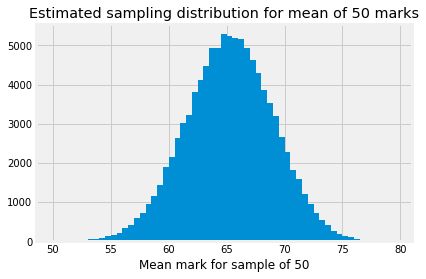

In [6]:
bin_edges = np.arange(50, 80, 0.5)
plt.hist(sample_means, bins=bin_edges)
plt.xlabel('Mean mark for sample of 50')
plt.title('Estimated sampling distribution for mean of 50 marks');

Notice that the distribution has a very slightly longer left tail.

We can use `plt.hist` to give us the counts for each of these bins, by storing
the values that `plt.hist` returns, like this:

array([   2.,    3.,   12.,   10.,   16.,   21.,   54.,   56.,   80.,
        132.,  152.,  222.,  327.,  406.,  585.,  731.,  956., 1167.,
       1428., 1889., 2155., 2634., 3027., 3236., 3806., 4107., 4481.,
       4939., 4935., 5287., 5253., 5188., 5174., 4946., 4639., 4291.,
       3875., 3523., 3188., 2672., 2283., 1817., 1587., 1201.,  961.,
        722.,  541.,  421.,  273.,  189.,  131.,  107.,   61.,   41.,
         23.,   10.,   11.,    6.,    3.])

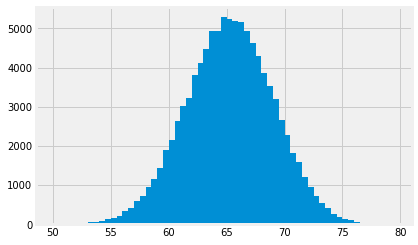

In [7]:
# Store the values that plt.hist returns.
hist_vals = plt.hist(sample_means, bins=bin_edges)
# Counts per bin is the first returned value.
counts = hist_vals[0]
counts

As we saw in the page on [using minimize]({{ site.baseurl
}}/chapters/08/using_minimize#unpacking), we can get this value a little more
neatly by *unpacking* the return values from `plt.hist`, like this:

array([   2.,    3.,   12.,   10.,   16.,   21.,   54.,   56.,   80.,
        132.,  152.,  222.,  327.,  406.,  585.,  731.,  956., 1167.,
       1428., 1889., 2155., 2634., 3027., 3236., 3806., 4107., 4481.,
       4939., 4935., 5287., 5253., 5188., 5174., 4946., 4639., 4291.,
       3875., 3523., 3188., 2672., 2283., 1817., 1587., 1201.,  961.,
        722.,  541.,  421.,  273.,  189.,  131.,  107.,   61.,   41.,
         23.,   10.,   11.,    6.,    3.])

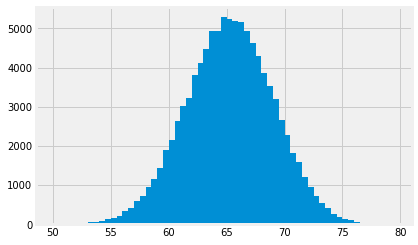

In [8]:
# Store the values that plt.hist returns.
# We will only use the first of these.
counts, edges, patches = plt.hist(sample_means, bins=bin_edges)
# Counts per bin (again):
counts

If we show the counts as a bar graph, it is the same as the histogram, because
it is using the same values.  We use the bin centers instead of the bin edges
for the x axis, as the histogram routine does, internally.

In [9]:
# Get bin centers by dropping the right hand edge, add half bin width.
bin_centers = bin_edges[:-1] + 0.25
bin_centers

array([50.25, 50.75, 51.25, 51.75, 52.25, 52.75, 53.25, 53.75, 54.25,
       54.75, 55.25, 55.75, 56.25, 56.75, 57.25, 57.75, 58.25, 58.75,
       59.25, 59.75, 60.25, 60.75, 61.25, 61.75, 62.25, 62.75, 63.25,
       63.75, 64.25, 64.75, 65.25, 65.75, 66.25, 66.75, 67.25, 67.75,
       68.25, 68.75, 69.25, 69.75, 70.25, 70.75, 71.25, 71.75, 72.25,
       72.75, 73.25, 73.75, 74.25, 74.75, 75.25, 75.75, 76.25, 76.75,
       77.25, 77.75, 78.25, 78.75, 79.25])

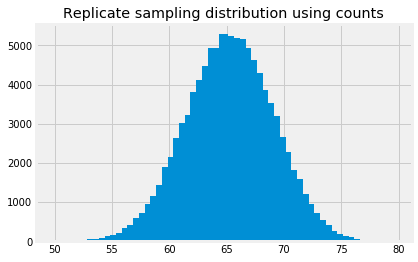

In [10]:
plt.bar(bin_centers, counts)
plt.title('Replicate sampling distribution using counts');

For each bin, `counts` gives the count of the 10000 samples we took had a mean
between the bin edges.  For example, the center of the bin at index 20 is:

In [11]:
bin_centers[20]

60.25

This the bin counting all the sample mean values between 60 and 60.5.  It has a
lower edge of 60, and an upper edge of 60.5.

In [12]:
print('Lower edge:', bin_edges[20])
print('Upper edge (not included):', bin_edges[21])

Lower edge: 60.0
Upper edge (not included): 60.5


The count in that bin is:

In [13]:
counts[20]

2155.0

This is the count of the 100000 sample means from our estimated sampling
distribution, that were from 60 up to, but not including, 60.5.

Dividing the counts by the number of samples, we get the proportion of samples
that fall in this range:

In [14]:
proportions = counts / n_samples
proportions

array([0.    , 0.    , 0.0001, 0.0001, 0.0002, 0.0002, 0.0005, 0.0006,
       0.0008, 0.0013, 0.0015, 0.0022, 0.0033, 0.0041, 0.0059, 0.0073,
       0.0096, 0.0117, 0.0143, 0.0189, 0.0215, 0.0263, 0.0303, 0.0324,
       0.0381, 0.0411, 0.0448, 0.0494, 0.0493, 0.0529, 0.0525, 0.0519,
       0.0517, 0.0495, 0.0464, 0.0429, 0.0387, 0.0352, 0.0319, 0.0267,
       0.0228, 0.0182, 0.0159, 0.012 , 0.0096, 0.0072, 0.0054, 0.0042,
       0.0027, 0.0019, 0.0013, 0.0011, 0.0006, 0.0004, 0.0002, 0.0001,
       0.0001, 0.0001, 0.    ])

For example, here is the proportion of sample means that fell between 60 and
60.5:

In [15]:
proportions[20]

0.02155

In other words, given this estimated sampling distribution, for this world with
a mean of 62.25, the probability of any one sample mean being between 60 and
60.5 is:

In [16]:
proportions[20]

0.02155

The bar graph of the proportions is the same as the histogram, but with the y
values divided by the number of samples (100000):

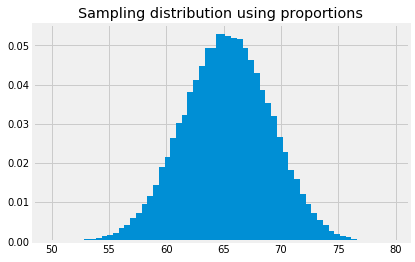

In [17]:
plt.bar(bin_centers, proportions)
plt.title('Sampling distribution using proportions');

Now we are in a position to answer something approaching our intermediate
question:

**Problem 1**: What is the probability that we will observe a *sample* mean of
*around* 58.74, given that the *population* mean is 62.25.

One difficulty with this question is that we do not know what the sampling
distribution would be for this hypothetical 2019 full set of marks, where the
population mean is 62.25.  For the moment, we will assume that the sampling
distribution is *exactly the same as it was in 2018*; this is the sampling
distribution we have already been using.

We find the bin corresponding to the sample mean of 58.74; this is the bin with
center 58.75, with edges 58.5 and 59.0.   It turns out this is the bin at index
17.

In [18]:
bin_58p75 = np.where(bin_centers == 58.75)
bin_58p75

(array([17]),)

Look back at [where and argmin]({{ site.baseurl
}}/chapters/08/where_and_argmin) for the trick here of using `np.where` to find
the index.

We get the proportion at that index, to give the probability that we will see a
sample mean between 58.5 and 59:

In [19]:
p_around_58p75 = proportions[bin_58p75]
p_around_58p75

array([0.0117])

We highlight this proportion in red:

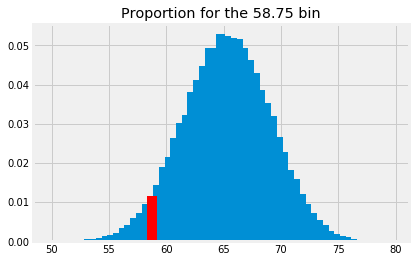

In [20]:
plt.bar(bin_centers, proportions)
plt.bar(58.75, p_around_58p75, color='red')
# Store the x and y axis limits for later
xy_lims = plt.axis()
plt.title('Proportion for the 58.75 bin');

This is the probability of something close to our observed sample mean (58.74)
given an eventual population mean of 62.25, and our assumed sampling
distribution.  The probability we have just found corresponds to the population
mean.  We start a new graph were we record the probability at its corresponding
population mean:

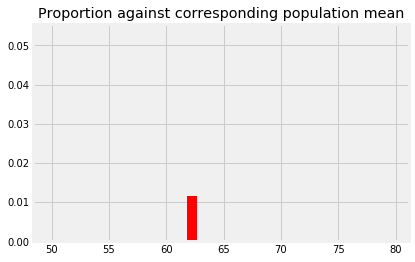

In [21]:
plt.bar(62.25, p_around_58p75, color='red')
plt.axis(xy_lims)  # Use the axis limits from the previous plot.
plt.title('Proportion against corresponding population mean');

Let us try a slightly more difficult intermediate problem:

**Problem 2**: What is the probability that we will observe a *sample* mean of
*around* 58.74, given that the *population* mean is 61.75?

Notice the new hypothetical population mean that is the population mean from
2018, minus 0.5.

For problem 1, we assumed the sampling distribution was the same as it was in
2018, when the mean was, in fact, around 62.25.  Now we need the sampling
distribution for the case where the mean is 0.5 less, at 61.75.

We will assume that the *shape* of this hypothetical sampling distribution does
not change from the one we have used from 2018, but the *center* does change,
from 62.25 to 62.75. In other words, our assumed sampling distribution shifts
0.5 to the left on the x axis:

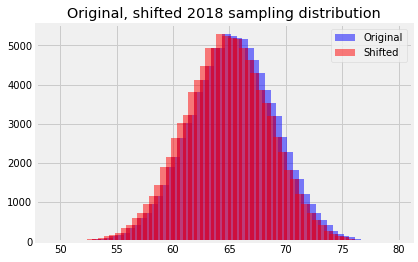

In [22]:
plt.bar(bin_centers, counts, alpha=0.5, color='blue',
   label='Original')
# Shift x values 0.5 (one bin) to the left.
bin_centers_1 = bin_centers - 0.5
plt.bar(bin_centers_1, counts, alpha=0.5, color='red',
  label='Shifted')
plt.legend()
plt.title('Original, shifted 2018 sampling distribution');

With the shifted sampling distribution, we just follow the same recipe as we
did for the population mean of 62.25.

In [23]:
bin_58p75_1 = np.where(bin_centers_1 == 58.75)
bin_58p75_1

(array([18]),)

This is the bin at index 18 instead of the bin at index 17, that we found last
time.  We have shifted the distribution one bin width to the left, so our
corresponding bin in the sampling distribution is one bin to the right.

The proportion we want is:

In [24]:
p_around_58p75_1 = proportions[bin_58p75_1]
p_around_58p75_1

array([0.0143])

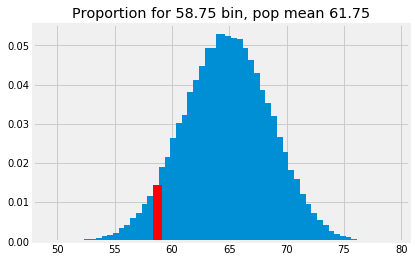

In [25]:
plt.bar(bin_centers_1, proportions)
plt.bar(58.75, p_around_58p75_1, color='red')
# Store the x and y axis limits for later
xy_lims = plt.axis()
plt.title('Proportion for 58.75 bin, pop mean 61.75');

This is the probability of something close to our observed sample mean (58.74)
given an eventual population mean of 61.75, and our assumed sampling
distribution. The probability corresponds to the eventual population mean, so
we add the probability value to the plot at this population mean:

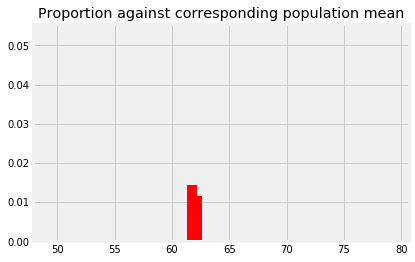

In [26]:
# The previous p we found for 62.25
plt.bar(62.25, p_around_58p75, color='red')
# The new p we found for 61.75
plt.bar(61.75, p_around_58p75_1, color='red')
plt.axis(xy_lims)  # Use the axis limits from the previous plot.
plt.title('Proportion against corresponding population mean');

You can probably see how this is going to pan out now, but let us do the 61.25
bin for practice.

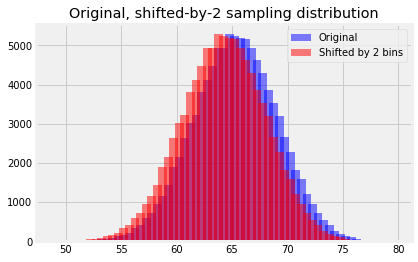

In [27]:
# Original distribution.
plt.bar(bin_centers, counts, alpha=0.5, color='blue',
   label='Original')
# Shift x values by 1 (two bins) to the left.
bin_centers_2 = bin_centers - 1
plt.bar(bin_centers_2, counts, alpha=0.5, color='red',
  label='Shifted by 2 bins')
plt.legend()
plt.title('Original, shifted-by-2 sampling distribution');

In [28]:
# We are now looking at the next bin to the right in the distribution.
bin_58p75_2 = np.where(bin_centers_2 == 58.75)
bin_58p75_2

(array([19]),)

In [29]:
p_around_58p75_2 = proportions[bin_58p75_2]
p_around_58p75_2

array([0.0189])

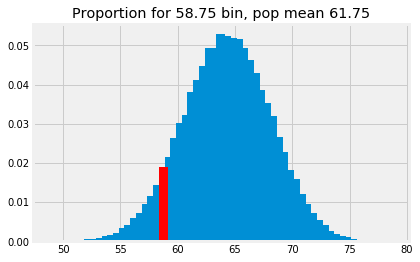

In [30]:
plt.bar(bin_centers_2, proportions)
plt.bar(58.75, p_around_58p75_2, color='red')
# Store the x and y axis limits for later
xy_lims = plt.axis()
plt.title('Proportion for 58.75 bin, pop mean 61.75');

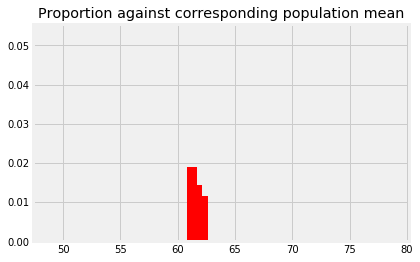

In [31]:
# The p we found for 62.25
plt.bar(62.25, p_around_58p75, color='red')
# The p we found for 61.75
plt.bar(61.75, p_around_58p75_1, color='red')
# The p we found for 61.25
plt.bar(61.25, p_around_58p75_2, color='red')
plt.axis(xy_lims)  # Use the axis limits from the previous plot.
plt.title('Proportion against corresponding population mean');

We can repeat this procedure for every population mean.  For every population
mean, we shift the sampling distribution, and get the corresponding probability
of getting something in the bin of the observed sample mean of 58.74. This is
the bin between 58.5 and 59, centered on 58.75.

In [32]:
# Bin centers at which to estimate probability.
population_means = np.arange(42.75, 67.75, 0.5)
population_means

array([42.75, 43.25, 43.75, 44.25, 44.75, 45.25, 45.75, 46.25, 46.75,
       47.25, 47.75, 48.25, 48.75, 49.25, 49.75, 50.25, 50.75, 51.25,
       51.75, 52.25, 52.75, 53.25, 53.75, 54.25, 54.75, 55.25, 55.75,
       56.25, 56.75, 57.25, 57.75, 58.25, 58.75, 59.25, 59.75, 60.25,
       60.75, 61.25, 61.75, 62.25, 62.75, 63.25, 63.75, 64.25, 64.75,
       65.25, 65.75, 66.25, 66.75, 67.25])

In [33]:
n_means = len(population_means)
ps_for_mean = np.zeros(n_means)
for i in np.arange(n_means):
    # Shift the x positions of the sampling distribution.
    pop_mean = population_means[i]
    mean_diff = 62.25 - pop_mean
    new_bin_centers = bin_centers - mean_diff
    # Find the bin corresponding to the sample mean.
    is_our_bin = new_bin_centers == 58.75
    # We might have gone too far, so there is no corresponding bin.
    if np.count_nonzero(is_our_bin) == 0:
        continue
    # Store the probability for this population mean.
    ps_for_mean[i] = proportions[is_our_bin]
ps_for_mean

array([0.0001, 0.0001, 0.0002, 0.0004, 0.0006, 0.0011, 0.0013, 0.0019,
       0.0027, 0.0042, 0.0054, 0.0072, 0.0096, 0.012 , 0.0159, 0.0182,
       0.0228, 0.0267, 0.0319, 0.0352, 0.0387, 0.0429, 0.0464, 0.0495,
       0.0517, 0.0519, 0.0525, 0.0529, 0.0493, 0.0494, 0.0448, 0.0411,
       0.0381, 0.0324, 0.0303, 0.0263, 0.0215, 0.0189, 0.0143, 0.0117,
       0.0096, 0.0073, 0.0059, 0.0041, 0.0033, 0.0022, 0.0015, 0.0013,
       0.0008, 0.0006])

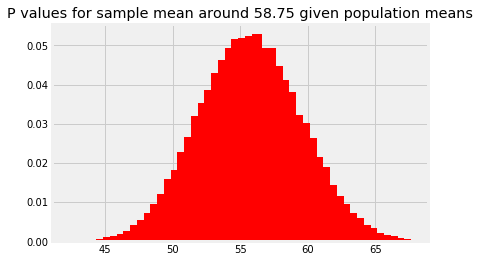

In [34]:
plt.bar(population_means, ps_for_mean, color='red')
plt.title('P values for sample mean around 58.75 given population means');

For reasons that might be clear from the calculations above, this probability
distribution is our original assumed sampling distribution, but:

* Reversed so the right tail has become the left tail, and vice versa, and
* Shifted so that the mean of the distribution sits over the observed sample
  mean.

We can put both distributions on the plot to show this more clearly:

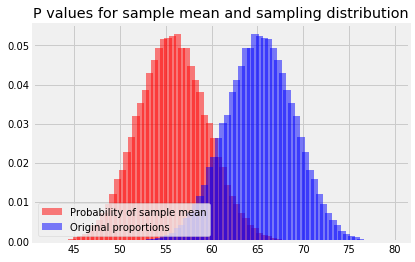

In [35]:
plt.bar(population_means, ps_for_mean, color='red',
   alpha=0.5,
   label='Probability of sample mean')
plt.bar(bin_centers, proportions, color='blue',
    alpha=0.5,
    label='Original proportions')
plt.legend(loc='lower left')
plt.title('P values for sample mean and sampling distribution');

## Reversing the probabilities

Remember that each of the p values in shown on the y axis in our red
distribution above are: The probability of seeing a sample mean of around 52.75
given a population mean of the corresponding x value.

We want to reverse this probability.  We want the probability that the
population mean is a certain value (on the x axis), given that we have sample
mean of around 58.75.

To do this, we follow the rules in [reverse probability]({{ site.baseurl
}}/chapters/10/first_bayes) and [Bayes bars]({{ site.baseurl
}}/chapters/10/bayes_bars).

These are:

1. Get the probabilities of the sample mean given each population mean; these
   are the red values in the plot above.  Call these the *forward*
   probabilities.
2. Scale the forward probabilities by the initial or *prior* probability of
   each population mean (we will have to decide what those are).
3. Divide the results by the sum of the results from step 2 to get the reverse
   or *posterior* probabilities.

For step 2, we will assume that there is an equal prior (initial) probability
for each of our possible population means.

In [36]:
# All the population means we have tried have the same initial probability.
prior_pop_mean_ps = np.ones(n_means) / n_means
prior_pop_mean_ps

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

Continuing with step 2, we scale the forward probabilities by the prior
probabilities, and divide by the resulting sum, to get the posterior (reverse)
probabilities:

In [37]:
prior_times_forwards = prior_pop_mean_ps * ps_for_mean
posterior_ps = prior_times_forwards / np.sum(prior_times_forwards)
posterior_ps

array([0.0001, 0.0001, 0.0002, 0.0004, 0.0006, 0.0011, 0.0013, 0.0019,
       0.0027, 0.0042, 0.0054, 0.0072, 0.0096, 0.012 , 0.0159, 0.0182,
       0.0229, 0.0268, 0.0319, 0.0353, 0.0388, 0.043 , 0.0465, 0.0495,
       0.0518, 0.0519, 0.0526, 0.0529, 0.0494, 0.0495, 0.0449, 0.0411,
       0.0381, 0.0324, 0.0303, 0.0264, 0.0216, 0.0189, 0.0143, 0.0117,
       0.0096, 0.0073, 0.0059, 0.0041, 0.0033, 0.0022, 0.0015, 0.0013,
       0.0008, 0.0006])

These are now the probabilities of each population mean, given the sample mean
of around 58.75.

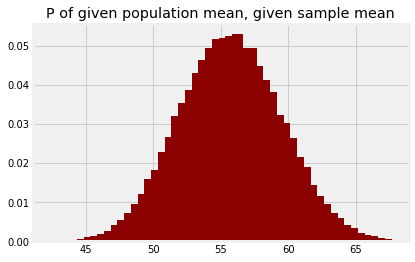

In [38]:
plt.bar(population_means, posterior_ps, color='darkred')
plt.title('P of given population mean, given sample mean');

You might notice that this looks very much like the original plot (in red,
above) of the probabilities of the sample mean, given the population means.

In fact is it is the same, and this is because:

* As you saw in [reverse probability]({{ site.baseurl
  }}/chapters/10/first_bayes) and [Bayes bars]({{ site.baseurl
  }}/chapters/10/bayes_bars), when all the prior (initial) probabilities are
  the same, we can skip the step of multiplying the forward (red) values by the
  prior (initial) probabilities.
* The forward (red) values were proportions, and so all the red values add up
  to 1, corresponding to all the sample means.  Therefore, step 3, dividing by
  the sum, is dividing by 1, and doesn't change the values.

The dark red distribution is very useful, because it can answer questions we are interested in.

Remember that each value in this plot is the probability of the corresponding
population means (on the x axis), given the observed sample mean of around
58.75 (in fact the sample mean was 58.74, but we will ignore that small
difference for now).

Remember too that the "population" we are interested in here is the eventual
7300 or so marks from 2019.

We see quickly that our sample mean makes it perfectly plausible that the
eventual population mean will be at or above the previous mean of 62 or so,
because a substantial proportion the area of the distribution corresponds to
values of 62 or greater.

In fact, we could do better than this, and work out the population mean
threshold, such that about 5% of the distribution is above threshold. Call this
threshold `t`. Once we have found this value, `t`, we can say that there is
about a 95% chance that the eventual population mean will be less than or equal
to `t`.  We could call `t` the 5% upper *confidence limit*, because we are 95%
confident that the eventual population mean will be less than or equal to this
value.

To get this value, we can use the `np.cumsum` function, first mentioned in the
[arrays]({{ site.baseurl }}/chapters/03/Arrays) page. It takes an input array
say `a`, and returns another array, say `b` that is the same size as `a`, but
which has, at each element, the result of summing up all the elements in `a` up
to the corresponding position.  This might be clearer by example:

In [39]:
# np.cumsum - for each element, add all elements so far.
a = np.array([1, 2, 5, 2, 0])
np.cumsum(a)

array([ 1,  3,  8, 10, 10])

We can do the same with the posterior probabilities:

In [40]:
cumulative_post_ps = np.cumsum(posterior_ps)
cumulative_post_ps

array([0.0001, 0.0002, 0.0004, 0.0009, 0.0015, 0.0025, 0.0038, 0.0057,
       0.0085, 0.0127, 0.0181, 0.0253, 0.035 , 0.047 , 0.0629, 0.0811,
       0.1039, 0.1307, 0.1626, 0.1979, 0.2367, 0.2797, 0.3261, 0.3756,
       0.4274, 0.4794, 0.532 , 0.5849, 0.6344, 0.6838, 0.7287, 0.7698,
       0.8079, 0.8403, 0.8706, 0.897 , 0.9186, 0.9375, 0.9518, 0.9635,
       0.9731, 0.9804, 0.9862, 0.9903, 0.9936, 0.9958, 0.9973, 0.9986,
       0.9994, 1.    ])

Notice that, towards the end of this array, we reach 0.95; this means that the
probability values up to this point add up to 0.95 or more; equivalently, that
we already have 95% of the probability or more at this point.

In the following code, we get True if we have not yet reached 0.95, and False
after that.

In [41]:
cum_ps_lte_0p95 = cumulative_post_ps <= 0.95
cum_ps_lte_0p95

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False])

We want the largest of the corresponding population mean values, to get our
`t`.

In [42]:
t = np.max(population_means[cum_ps_lte_0p95])
t

61.25

This calculation tells us that, *given our assumptions*, there is a 95% chance
that the eventual population mean will be less than or equal to our found `t`.
`t` is our 95% upper confidence limit.

It looks like we are moderately confident that the mean of the marks will be
less in 2019 than it was in 2018.


## A short cut for the calculations

In this exposition, we started by breaking up the sampling distribution into a
counts values from a histogram; converting the counts into a proportions, and
then transforming the proportions by shifting on the x axis, and reversing
them.  We found this was our posterior probability distribution, and then we
used the cumulative sum of this distribution to find our upper tail threshold.

In fact we can do equivalent operations without having to break up the
distribution into counts, by applying the same transformations to the values
in the sampling distribution.

Here is the sampling distribution (again):

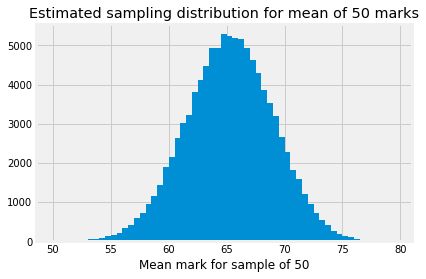

In [43]:
plt.hist(sample_means, bins=bin_edges)
plt.xlabel('Mean mark for sample of 50')
plt.title('Estimated sampling distribution for mean of 50 marks');

As we did for the proportions, we will shift this distribution to have a mean
at the observed sample mean, and take the mirror image around this point, like
this:

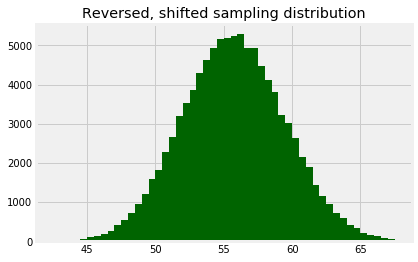

In [44]:
# Shift distribution to observed sample mean; take mirror image.
# Move distribution mean point to zero.
zero_centered = sample_means - 62.25
# Mirror image around zero point.
reversed = -zero_centered
# Add back the observed sample mean.
reversed_shifted = reversed + observed_sample_mean
# Show a histogram (and store the counts).
rs_counts, rs_edges, patches = plt.hist(reversed_shifted,
    bins=np.arange(42.5, 67.75, 0.5),
    color='darkgreen')
plt.title('Reversed, shifted sampling distribution');

Here's the same histogram, but built using the counts we got back from the
call, just to show it is the same.

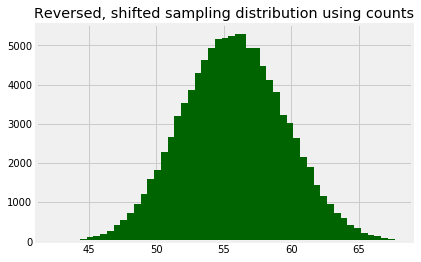

In [45]:
rs_centers = rs_edges[:-1] + 0.25
plt.bar(rs_centers, rs_counts, color='darkgreen')
plt.title('Reversed, shifted sampling distribution using counts');

Notice that, if we divide the counts in this histogram by the number of
samples, to get proportions, this looks very, very similar to the posterior
probabilities we have just calculated.  The plot below shows the populations
superimposed; they overlap so completely that you cannot distinguish the two.

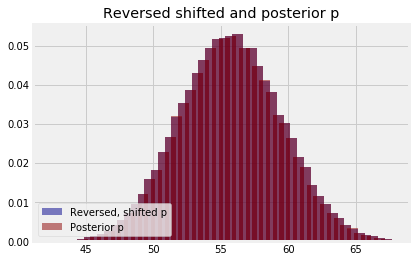

In [46]:
plt.bar(rs_centers, rs_counts / n_samples,
        color='darkblue',
        alpha=0.5,
        label='Reversed, shifted p')
plt.bar(population_means, posterior_ps,
        color='darkred',
        alpha=0.5,
        label='Posterior p')
plt.title('Reversed shifted and posterior p')
plt.legend(loc='lower left');

Using this reversed shifted version, we can get our threshold rather easily, by
asking for the percentiles of the distribution.

In [47]:
rs_t = np.percentile(reversed_shifted, 95)
rs_t

61.97

This is the 95% percentile, so it is the value such that 95% of the values are
less than this value, and 5% are greater than this value.

The reversed-shifted calculation is very similar to something called the
*Reverse Percentile Interval* for the *bootstrap* (see below, and [this
Wikipedia
section](https://en.wikipedia.org/wiki/Bootstrapping_%28statistics%29#Deriving_confidence_intervals_from_the_bootstrap_distribution) 

As you see, the result is near identical to the approximation we used above
when we broke the distribution into counts and used this for the posterior p
calculation.

## Estimating the sampling distribution

We emphasized *given our assumptions*.  One big assumption that we made was
that the sampling distribution of the mean was the same as that for 2018.  That
seems like a strong assumption; the sampling distribution of the mean will
depend on the distribution of the values, and that may have changed in 2019.

To be more general, we might also want to deal with a situation where we do not
have a roughly equivalent population to help us.  Here we had the distribution
of marks from 2018, but we will often be in the situation where we have a
sample mean, and no population to compare against.  What can we do to estimate
the sampling distribution, if all we have is the sample --- in our case, the
sample of 50 marks from 2019?

Enter the [bootstrap]({{ site.baseurl }}/chapters/10/bootstrap).